In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
billing = pd.read_csv("billing.csv") 
events = pd.read_csv("events.csv")
sessions = pd.read_csv("sessions.csv")
users = pd.read_csv('users.csv')

In [3]:
billing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000176 entries, 0 to 1000175
Data columns (total 8 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   user_id               1000176 non-null  object 
 1   month                 1000176 non-null  object 
 2   plan_tier             1000176 non-null  object 
 3   active_seats          1000176 non-null  int64  
 4   mrr                   1000176 non-null  float64
 5   discount_applied      1000176 non-null  int64  
 6   invoices_overdue      1000176 non-null  int64  
 7   support_ticket_count  1000176 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 61.0+ MB


In [4]:
discount = billing[billing['discount_applied'] == 1]

discount[discount['plan_tier'] == 'free']
discount['plan_tier'].unique()

array(['standard', 'premium'], dtype=object)

In [5]:
billing[billing['user_id'] == '3e39c0ea-ebbf-43bc-abd5-ab92eff6fa10']

,user_id,month,plan_tier,active_seats,mrr,discount_applied,invoices_overdue,support_ticket_count
29,3e39c0ea-ebbf-43bc-abd5-ab92eff6fa10,2024-05,standard,76,608.0,0,0,1
30,3e39c0ea-ebbf-43bc-abd5-ab92eff6fa10,2024-06,standard,75,600.0,0,0,0
31,3e39c0ea-ebbf-43bc-abd5-ab92eff6fa10,2024-07,standard,78,624.0,0,0,0
32,3e39c0ea-ebbf-43bc-abd5-ab92eff6fa10,2024-08,standard,79,632.0,0,0,1
33,3e39c0ea-ebbf-43bc-abd5-ab92eff6fa10,2024-09,standard,78,624.0,0,0,0
34,3e39c0ea-ebbf-43bc-abd5-ab92eff6fa10,2024-10,standard,99,792.0,0,0,2
35,3e39c0ea-ebbf-43bc-abd5-ab92eff6fa10,2024-11,standard,100,640.0,1,0,0
36,3e39c0ea-ebbf-43bc-abd5-ab92eff6fa10,2024-12,standard,101,808.0,0,0,2
37,3e39c0ea-ebbf-43bc-abd5-ab92eff6fa10,2025-01,standard,101,646.4,1,0,3
38,3e39c0ea-ebbf-43bc-abd5-ab92eff6fa10,2025-02,standard,100,800.0,0,0,2


why is conflucence not as popular as it is?

In [23]:
users

,user_id,signup_date,plan_tier,company_size,region,industry,acquisition_channel,is_enterprise,churned_30d,churned_90d,downgraded,expansion_event
0,f94d1824-8742-4000-8b6d-39d70958490b,2024-05-13,free,11-50,EU,software,seo,False,0,0,0,1
1,238bf0af-1f71-45e4-a47d-dcb5db33f71b,2025-04-11,standard,1-10,NaN,education,seo,False,0,0,0,0
2,ccf8fc06-3c86-433c-8867-9cba0fda337b,2024-10-28,free,1-10,APAC,transport,partner,False,0,0,0,1
3,3e39c0ea-ebbf-43bc-abd5-ab92eff6fa10,2024-05-17,standard,200+,APAC,software,partner,False,0,0,0,1
4,9304dcbe-682d-41fa-8bfd-861559f9f58b,2024-04-12,free,1-10,NaN,software,ads,False,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,e7e9d70c-478e-4d57-982a-53c98a175328,2024-09-17,premium,51-200,NaN,retail,partner,True,0,0,0,0
99996,1b74fc26-9c01-4aeb-95db-587abfda6e73,2024-04-29,free,11-50,NaN,finance,partner,False,0,1,0,1
99997,c209e590-7bcc-4aff-b3cd-c9c498491c22,2024-11-24,free,1-10,NaN,transport,seo,False,0,0,0,1
99998,06bde50d-e9b3-4db9-8353-cf0279d0060b,2025-05-01,premium,11-50,APAC,manufacturing,seo,False,0,0,0,0


In [24]:
enterprie_series = users[users['is_enterprise'] == True]['user_id']
enterprise_events = events[events['user_id'].isin(enterprie_series)]
feature_usage_counts = enterprise_events.groupby(['user_id', 'feature_name']).size().reset_index(name='count')
feature_usage_counts

,user_id,feature_name,count
0,0019f7b8-7e95-4034-b4d8-ec2ec6ebc16a,confluence_page,1
1,0023b23a-702a-4ad7-8b61-d46d52409b2e,confluence_ai_assist,4
2,0023b23a-702a-4ad7-8b61-d46d52409b2e,confluence_page,6
3,0023b23a-702a-4ad7-8b61-d46d52409b2e,team_invite,1
4,004b222c-943f-43f6-b35e-0a32337635c6,jira_automation,2
...,...,...,...
8290,ffd9677d-41cc-47ab-8e9d-5c49c10c6548,jira_board,2
8291,fff1364e-e576-4598-9482-447904d1d21f,confluence_ai_assist,1
8292,fff1364e-e576-4598-9482-447904d1d21f,confluence_page,1
8293,fff1364e-e576-4598-9482-447904d1d21f,team_invite,1


In [32]:
temp = billing[(~billing['user_id'].isin(enterprie_series))]
temp[temp['plan_tier'] != 'free']

,user_id,month,plan_tier,active_seats,mrr,discount_applied,invoices_overdue,support_ticket_count
15,238bf0af-1f71-45e4-a47d-dcb5db33f71b,2025-04,standard,1,8.0,0,0,0
16,238bf0af-1f71-45e4-a47d-dcb5db33f71b,2025-05,standard,1,8.0,0,0,0
17,238bf0af-1f71-45e4-a47d-dcb5db33f71b,2025-06,standard,1,8.0,0,0,0
18,238bf0af-1f71-45e4-a47d-dcb5db33f71b,2025-07,standard,1,8.0,0,0,0
29,3e39c0ea-ebbf-43bc-abd5-ab92eff6fa10,2024-05,standard,76,608.0,0,0,1
...,...,...,...,...,...,...,...,...
1000152,1b74fc26-9c01-4aeb-95db-587abfda6e73,2025-06,standard,6,48.0,0,0,0
1000153,1b74fc26-9c01-4aeb-95db-587abfda6e73,2025-07,standard,7,44.8,1,0,0
1000163,06bde50d-e9b3-4db9-8353-cf0279d0060b,2025-05,premium,12,180.0,0,0,0
1000164,06bde50d-e9b3-4db9-8353-cf0279d0060b,2025-06,premium,12,180.0,0,0,0


<Axes: xlabel='plan_tier', ylabel='count'>

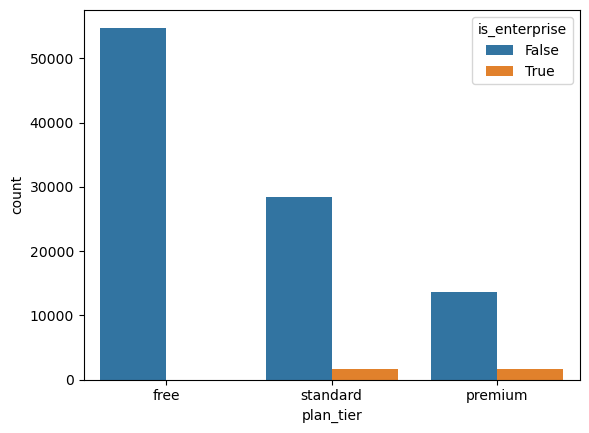

In [21]:
sns.countplot(users, x = 'plan_tier', hue =  'is_enterprise')

<Axes: xlabel='is_enterprise', ylabel='count'>

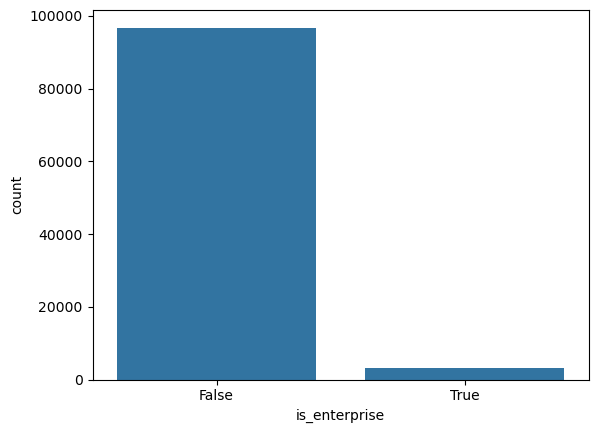

In [22]:
sns.countplot(users, x = 'is_enterprise')

In [40]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234329 entries, 0 to 234328
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   event_id      234329 non-null  object
 1   user_id       234329 non-null  object
 2   session_id    234329 non-null  object
 3   ts            234329 non-null  object
 4   feature_name  234329 non-null  object
 5   action        234329 non-null  object
 6   duration_ms   234329 non-null  int64 
 7   latency_ms    234329 non-null  int64 
 8   success       234329 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 16.1+ MB


In [43]:
events.head(10)

,event_id,user_id,session_id,ts,feature_name,action,duration_ms,latency_ms,success
0,665ea739-d80e-4d68-b0be-67b74b79984a,3e39c0ea-ebbf-43bc-abd5-ab92eff6fa10,e1c0b7e9-a987-43d6-8290-dc88c2cdf5c0,2024-05-28 01:39:27.377607462,jira_board,view,352,584,1
1,4259f36b-a4ec-41b2-9241-c2b90bf23f8c,3e39c0ea-ebbf-43bc-abd5-ab92eff6fa10,e1c0b7e9-a987-43d6-8290-dc88c2cdf5c0,2024-05-28 01:41:27.463905173,jira_board,view,1053,382,1
2,c819fc5b-2d79-455a-9685-5347dae03f68,3e39c0ea-ebbf-43bc-abd5-ab92eff6fa10,e1c0b7e9-a987-43d6-8290-dc88c2cdf5c0,2024-05-28 01:41:40.075644031,jira_automation,click,1185,103,1
3,c0ea5e8e-7236-4cd6-ab25-6c97b7f22465,3e39c0ea-ebbf-43bc-abd5-ab92eff6fa10,32d59800-6d39-44b9-a439-49e3efc8409b,2024-05-21 14:51:02.758816559,jira_board,click,1772,169,1
4,96819e5e-edf0-4277-87c1-5c16235c9dff,3e39c0ea-ebbf-43bc-abd5-ab92eff6fa10,32d59800-6d39-44b9-a439-49e3efc8409b,2024-05-21 14:45:34.284688915,team_invite,click,480,302,1
5,9406dd80-e05b-4cae-a3a5-39d74d80dbc4,3e39c0ea-ebbf-43bc-abd5-ab92eff6fa10,32d59800-6d39-44b9-a439-49e3efc8409b,2024-05-21 14:36:09.666750377,jira_board,view,343,157,1
6,83759028-468a-434f-8d00-00be800b6fdf,3e39c0ea-ebbf-43bc-abd5-ab92eff6fa10,c5b5502e-9738-4bd4-a83a-dc0c1e5b71d6,2024-05-17 02:00:19.831457850,bitbucket_integration,click,1050,132,1
7,5e2ff867-513f-4e73-ad8a-419b7d5eb30c,3e39c0ea-ebbf-43bc-abd5-ab92eff6fa10,d45a4159-1a16-467a-956a-1c5e07a46f9d,2024-11-18 15:44:57.820574887,jira_automation,complete,684,42,1
8,11105e14-7db2-4b0d-b0e3-6434933e76bf,3e39c0ea-ebbf-43bc-abd5-ab92eff6fa10,3c37a678-61c8-4f58-9ccc-f9d8c87b1829,2024-12-18 23:37:33.711964234,jira_board,click,458,326,1
9,c6f9c398-53fc-41b2-970d-99a068bd4f55,3e39c0ea-ebbf-43bc-abd5-ab92eff6fa10,fe707744-d72c-4281-baa6-68383d5c7500,2025-02-04 10:12:31.690387716,jira_board,view,676,32,1


In [52]:
events.groupby(['user_id']).size()

user_id
0000093e-7258-43c0-b212-ea7212795ddf    1
0006fdbd-c35d-4c0d-a948-e8ee10f279d5    1
0007ee13-0c60-4865-9464-914b2df654df    4
000836d5-0777-4310-a8a5-5c857d2ea5e5    1
0008a782-5378-45a1-b332-10c73c4296ff    6
                                       ..
fff8e699-03db-42d2-aad8-cefaf815a92d    9
fffa9cdd-f19a-4849-ae3b-2302b5b68020    3
fffce54a-cd86-4f93-b529-d92586690bd5    2
fffe77cc-44fd-401f-8fdd-9fa06afc6bc8    7
fffea094-3414-40c4-bab2-3925ba64491d    3
Length: 57312, dtype: int64

In [44]:
sessions[sessions['session_id']== 'e1c0b7e9-a987-43d6-8290-dc88c2cdf5c0']

,session_id,user_id,session_start,session_end,device,os,app_version,country,session_length_sec
0,e1c0b7e9-a987-43d6-8290-dc88c2cdf5c0,3e39c0ea-ebbf-43bc-abd5-ab92eff6fa10,2024-05-28 01:39:12.375697595,2024-05-28 01:42:32.409875869,web,win,1.0.3,AU,200


trello for normal people and jira for bigger commpany?

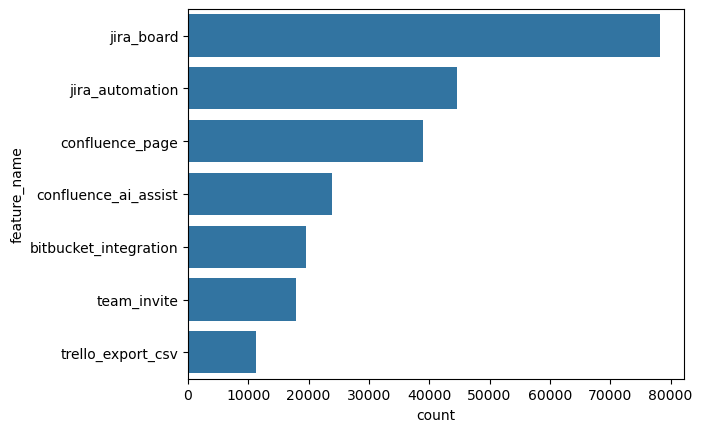

In [ ]:
order = events['feature_name'].value_counts().index

sns.countplot(data=events, y='feature_name', order=order)
plt.show()
